In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [247]:
#(a)
data=[]
for i in range(10000):
    u=np.random.uniform()
    if u<=0.1:
        data.append(np.random.normal(-1,0.2))
    elif 0.1<u and u<=0.6:
        data.append(np.random.normal(0,1))
    else:
        data.append(np.random.normal(1,0.4))

In [39]:
#(a)
def gibbs_mixture(y,mu_0,kappa,a_tau,b_tau,ite,H):
    N=len(y)
    #initialization
    n_h=[]
    pi_h=[]
    tau_h_sq=[[]]
    mu_h=[[]]
    pi_h=[[]]
    for h in xrange(H):
        n_h.append([1.*N/H])
        tau_h_sq[0].append(1.0)
        mu_h[0].append(0.0)
        pi_h[0].append(1./H)
    label=np.zeros(N).astype(int)
    components=np.arange(1,H+1)
    
    tau_h_sq=np.array(tau_h_sq)
    mu_h=np.array(mu_h)
    pi_h=np.array(pi_h)
    for i in xrange(ite):
        y_h=[]
        for h in xrange(H):
            y_h.append([])
        n_h=np.zeros(H)
        for j in xrange(N):
            Pr_z=pi_h[i]*sp.stats.norm.pdf(y[j],mu_h[i],np.sqrt(1./tau_h_sq[i]))/np.sum(pi_h[i]*sp.stats.norm.pdf(y[j],mu_h[i],np.sqrt(1./tau_h_sq[i])))
            label[j]=np.random.choice(components,p=Pr_z)
            n_h[label[j]-1]=n_h[label[j]-1]+1
            y_h[label[j]-1].append(y[j])
        y_h_bar=[]
        for h in xrange(H):
            y_h_bar.append(np.mean(y_h[h]))
        y_h_bar=np.array(y_h_bar)
        kappa_h_hat=1./(1./kappa+n_h)
        mu_h_hat=kappa_h_hat*(1./kappa_h_hat*mu_0+n_h*y_h_bar)
        a_h_hat=a_tau+n_h/2
        sum_h=[]
        pi_param=[]
        for h in xrange(H):
            sum_h.append(np.sum(np.square(y_h[h]-np.mean(y_h[h]))))
            pi_param.append(1./H+n_h[h])
        sum_h=np.array(sum_h)
        b_h_hat=np.array(b_tau+1./2*(sum_h+(n_h/(1+kappa*n_h))*np.square(y_h_bar-mu_0)))
        b_h_hat[np.isnan(b_h_hat)]=0.0
        tau_h_sq=np.vstack((tau_h_sq,sp.stats.invgamma.rvs(a=a_h_hat,scale=b_h_hat)))
        for p in range(len(tau_h_sq[i+1])):
            if tau_h_sq[i+1][p]==0:
                tau_h_sq[i+1][p]=0.00001
        mu_h=np.vstack((mu_h,np.random.normal(mu_h_hat,np.sqrt(kappa_h_hat*tau_h_sq[i+1]))))
        pi_h=np.vstack((pi_h,np.random.dirichlet(pi_param)))
    return np.array([y_h,tau_h_sq.tolist(),mu_h.tolist(),pi_h.tolist()])
        
    
    

In [48]:
result=gibbs_mixture(data,0,1,1,1,1000,20)

In [51]:
DataFrame(result[2])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.769524,-0.624004,0.650217,-0.943378,0.400018,0.205635,0.436555,-0.635941,2.220180,-0.098806,0.358087,0.533868,1.093373,0.786272,-0.016335,0.268387,0.719177,0.734937,0.032698,-0.613562
2,0.315833,-0.512517,-0.011306,NaN,0.749338,0.309591,0.655496,0.292770,0.390562,-0.165646,0.019072,1.044435,2.020738,0.933337,0.768139,0.544878,0.735393,1.203025,0.745678,-0.329628
3,0.362461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.319000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.268297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.394476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.378199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.368167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.279250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
# The Steps is on pp.552-553
def blocked_gibbs(y,C,alpha,a,b,iteration):
    N=len(y)
    index=np.arange(1,C+1)
    mu=[[]]
    sigma=[[]]
    pi=[[]]
    #initialization
    for c in xrange(C):
        mu[0].append(0.0)
        sigma[0].append(1.0)
        pi[0].append(1./C)
    for ite in xrange(iteration):
        # Step 1
        S=[]
        for i in xrange(N):
            Z=np.sum(pi[ite]*sp.stats.norm.pdf(y[i],mu[ite],np.sqrt(sigma[ite])))
            prob=[]
            for c in xrange(C):
                prob.append(pi[ite][c]*sp.stats.norm.pdf(y[i],mu[ite][c],np.sqrt(sigma[ite][c]))/Z)
            S.append(np.random.choice(index,p=prob))
        n=[]
        for c in xrange(C):
            n.append(S[S==c].size)
        # Step2
        V=[]
        pi.append([])
        for c in xrange(C-1):
            if c==0:
                V.append(np.random.beta(1+n[c],alpha+np.sum(n[0:c+1])))
                pi[ite+1].append(V[c])
            else:
                V.append(np.random.beta(1+n[c],alpha+np.sum(n[0:c+1])))
                pi[ite+1].append(V[c]*np.prod(1-np.array(V[0:c])))
        pi[ite+1].append(1-np.sum(pi[ite+1]))
        # Step 3
        mu.append([])
        sigma.append([])
        for c in xrange(C):
            if n[c]==0:
                sigma[ite+1].append(np.sqrt(sp.stats.invgamma.rvs(a=a,scale=b)))
                mu[ite+1].append(np.random.normal(0,1))
            else:
                sigma[ite+1].append(np.sqrt(sp.stats.invgamma.rvs(a=1.*n[c]/2+a,scale=1)/(b+0.5*np.sum(np.square(y[S==c]-mu[ite][c])))))
                mu[ite+1].append(np.random.normal(np.mean(y[S==c]),sigma[ite+1][c])/n[c])
    return [[y,S],mu,sigma,pi]
    
    

In [248]:
result=blocked_gibbs(data,20,1./20,1,1,1000)

In [249]:
S=np.array(result[0][1])
y=np.array(data)

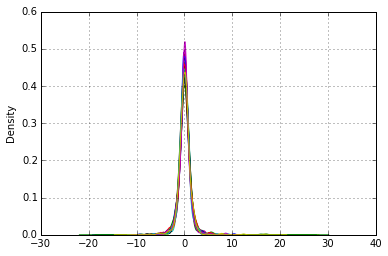

In [250]:
for c in range(20):
    DataFrame(result[1][500:]).ix[:,c].plot(kind="kde")

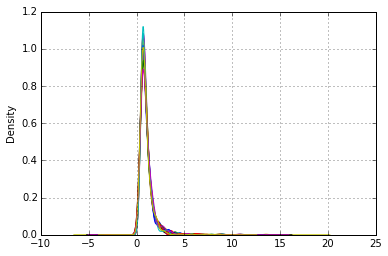

In [251]:
for c in range(20):
    DataFrame(result[2][500:]).ix[:,c].plot(kind="kde")

In [256]:
S

array([1, 1, 1, ..., 1, 1, 1])

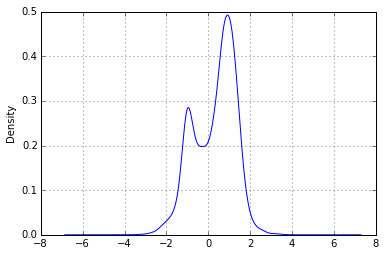

In [253]:
Series(y[S==1]).plot(kind="kde")

In [254]:
DataFrame(result[3])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
1,0.508964,0.431804,0.044147,0.006120,0.000997,0.004250,0.000873,0.000270,0.000852,0.000225,0.000180,0.000143,0.000083,0.000061,0.000164,0.000096,0.000123,0.000040,0.000074,0.000533
2,0.988766,0.008265,0.002342,0.000108,0.000107,0.000029,0.000003,0.000052,0.000022,0.000078,0.000001,0.000041,0.000041,0.000017,0.000014,0.000009,0.000013,0.000001,0.000003,0.000088
3,0.848315,0.120376,0.017362,0.003168,0.005810,0.002147,0.000262,0.000449,0.000160,0.000103,0.000145,0.000303,0.000138,0.000045,0.000234,0.000120,0.000035,0.000030,0.000028,0.000770
4,0.503483,0.398317,0.024728,0.011036,0.006301,0.005602,0.001100,0.009465,0.005496,0.002864,0.003833,0.006932,0.003915,0.000705,0.000515,0.002306,0.001153,0.001128,0.001557,0.009565
5,0.809994,0.150383,0.025886,0.008037,0.001390,0.001140,0.000985,0.000202,0.000320,0.000208,0.000113,0.000375,0.000051,0.000220,0.000090,0.000067,0.000064,0.000042,0.000037,0.000395
6,0.257174,0.540636,0.071178,0.068628,0.014410,0.009994,0.007907,0.005388,0.004232,0.007824,0.002536,0.003052,0.000855,0.001165,0.000273,0.000620,0.000234,0.000455,0.000048,0.003391
7,0.411485,0.375089,0.090655,0.029864,0.032584,0.020020,0.008983,0.003856,0.004385,0.000899,0.006598,0.001671,0.001288,0.002263,0.000302,0.002964,0.000431,0.001343,0.000398,0.004921
8,0.616187,0.111818,0.145755,0.064390,0.031544,0.004890,0.013423,0.004368,0.000548,0.001094,0.001032,0.000349,0.000831,0.000635,0.000258,0.000366,0.000110,0.000137,0.000142,0.002120
9,0.562145,0.157187,0.091172,0.073167,0.026496,0.008069,0.036834,0.009773,0.002237,0.007012,0.004027,0.001885,0.002217,0.002483,0.001658,0.000292,0.001852,0.000219,0.000744,0.010530
